In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns

In [2]:
def get_data(token):
    if token == 'FLOW':
        exchange = 'kraken'
    else:
        exchange = 'coinbase-pro'
        
    res = requests.get(
    f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc',
    params={
        'periods': '3600',
        'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
    }
    )
    
    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df


In [3]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [4]:
df_base = pd.concat(get_data(token) for token in tokens)

In [5]:
df = df_base.set_index('ts')
df

,open,high,low,close,volume,volumeUSD,token
ts,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...
2021-12-18 06:00:00,8.378,8.442,8.378,8.418,1484.637511,1.250233e+04,FLOW
2021-12-18 07:00:00,8.421,8.428,8.411,8.411,834.153000,7.027877e+03,FLOW
2021-12-18 08:00:00,8.398,8.435,8.390,8.435,5626.783929,4.730936e+04,FLOW


In [6]:
df.groupby('token')['volumeUSD'].sum().to_frame().sort_values('volumeUSD', ascending=False)

,volumeUSD
token,
ETH,2.448603e+10
SOL,8.017212e+09
AVAX,4.282396e+09
USDT,2.214863e+09
FLOW,9.540443e+07


In [7]:
eth = df['close'][df['token']=='ETH'].values
sol = df['close'][df['token']=='SOL'].values
mask1 = df['token']=='ETH'
mask2 = df['token']=='SOL'
df.loc[mask1, 'ratio'] = eth/sol
df.loc[mask2, 'ratio'] = eth/sol
df.head()

,open,high,low,close,volume,volumeUSD,token,ratio
ts,,,,,,,,
2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH,18.891059


In [8]:
renamed_df = df.rename(
    columns={
        'volume':'VolumeBase',
        'volumeUSD':'volumeTerm'
    }
)
renamed_df.head()

,open,high,low,close,VolumeBase,volumeTerm,token,ratio
ts,,,,,,,,
2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH,18.891059


In [9]:
dfn = pd.DataFrame()
for token in tokens:
    dfn[token] = df['close'][df['token']==token]
dfn.head()

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581


In [10]:
log_ret = dfn.values
df_log = dfn.copy()
df_log.iloc[1:] = np.log(log_ret[1:,:] / log_ret[:-1, :])
df_log.iloc[0] = np.nan
df_log.head()

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214


In [11]:
df_corr = df_log.iloc[1:].corr(method='pearson')
df_corr

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.756320,0.656548,-0.088336,0.582562
SOL,0.756320,1.000000,0.648520,0.110556,0.475434
AVAX,0.656548,0.648520,1.000000,0.013442,0.403926
USDT,-0.088336,0.110556,0.013442,1.000000,-0.176690
FLOW,0.582562,0.475434,0.403926,-0.176690,1.000000


<AxesSubplot:>

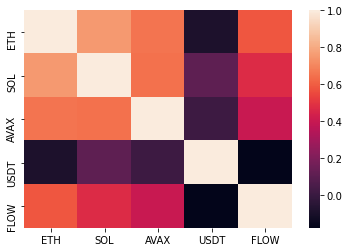

In [12]:
sns.heatmap(df_corr)